<a href="https://colab.research.google.com/github/hansensean123-cell/Sean-Hansen/blob/main/Assignments/assignment_14_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Assignment 18: Exploring APIs with yfinance

In this assignment, you will:
- Choose an industry you're interested in (such as tech, airlines, or retail)
- Use the `yfinance` Python package as an API to collect historical stock price data
- Clean and prepare the data for analysis
- Explore trends, volatility, and relationships between companies
- Summarize your findings and recommendation in a business memo

## Why This Matters

APIs (Application Programming Interfaces) allow businesses to pull live, real-world data from external sources directly into their analytics tools. Financial analysts, investment firms, and business leaders use APIs like `yfinance` to monitor company performance, assess market trends, and build models based on dynamic data.

This assignment helps you gain hands-on experience with one of the most common API workflows in business analytics: fetching, cleaning, analyzing, and interpreting financial data to support better decision-making.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_14_api.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Step 1: Choose an Industry and Find Company Ticker Symbols

Visit the following website to explore U.S. stock sectors and industries:  
https://www.tradingview.com/markets/stocks-usa/sectorandindustry-sector/

Choose one industry you are interested in (for example: Airlines, Technology, Fast Food, Retail, Energy, etc.).  
Write the names and ticker symbols of 4 public companies in that industry.

**Example:**
- Industry: Technology  
- Tickers: AAPL, MSFT


In [1]:
# Replace this list with your selected tickers
tickers = ['JPM', 'V', 'MA', 'BAC']

## Step 2: Use yfinance to Collect Historical Stock Data

Follow the steps below to use the `yfinance` API to collect historical stock price data.

### Instructions

1. Make sure the `yfinance` package is installed by running the code cell below.
2. Import any additional Python libraries that you might need to explore or visualize the data.
3. Use the `yf.download()` function to pull **5 years of daily adjusted close prices** for the companies you selected in Step 1.
    - Choose a start date and an end date that span the past 5 years (e.g., `"2020-01-01"` to `"2025-12-31"`).
    - Only select the **'High'** column, which represents the daily high
4. Preview the first few rows of the dataset using `.head()` to confirm that the data has loaded correctly.



In [2]:
# Import necessary libraries
!pip install yfinance

import yfinance as yf
import pandas as pd

In [3]:
# Download adjusted close prices
df = yf.download(tickers, start="2020-01-01", end="2025-12-31")['High']

/tmp/ipython-input-3450391006.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="2020-01-01", end="2025-12-31")['High']
[*********************100%***********************]  4 of 4 completed


In [4]:
df.head()

Ticker,BAC,JPM,MA,V
Date,,,,
2020-01-02,30.937680,119.581855,293.473939,183.205423
2020-01-03,30.495218,118.754529,292.400560,183.032869
2020-01-06,30.278321,117.935736,291.346724,181.355554
2020-01-07,30.295681,117.586007,293.328875,182.208558
2020-01-08,30.529922,117.347210,297.176446,184.508974


## Step 3: Clean the Data

The data you pulled may contain missing values. Follow these steps:

1. Check the dataset for missing values using `.isnull().sum()`.
2. Fill any missing values using a forward fill method.
3. Recheck for missing values to confirm they have been handled.



In [12]:
# Add code here 🔧
df.isnull().sum()

df_cleaned = df.ffill()
print("DataFrame after forward fill:")
print(df_cleaned.head())

df_cleaned.isnull().sum()





DataFrame after forward fill:
Ticker            BAC         JPM          MA           V
Date                                                     
2020-01-02  30.937680  119.581855  293.473939  183.205423
2020-01-03  30.495218  118.754529  292.400560  183.032869
2020-01-06  30.278321  117.935736  291.346724  181.355554
2020-01-07  30.295681  117.586007  293.328875  182.208558
2020-01-08  30.529922  117.347210  297.176446  184.508974


,0
Ticker,
BAC,0
JPM,0
MA,0
V,0


## Step 4: Calculate Daily Returns

To better understand price movement, calculate the daily percentage change for each stock.

1. Use the `.pct_change()` method to calculate daily returns.
2. Drop any rows with missing values that may result from this calculation.
3. Preview the returns DataFrame to confirm it's correct.


In [13]:
# Add code here 🔧
daily_returns = df_cleaned.pct_change()
daily_returns = daily_returns.dropna()
daily_returns.head()

Ticker,BAC,JPM,MA,V
Date,,,,
2020-01-03,-0.014302,-0.006918,-0.003657,-0.000942
2020-01-06,-0.007112,-0.006895,-0.003604,-0.009164
2020-01-07,0.000573,-0.002965,0.006803,0.004703
2020-01-08,0.007732,-0.002031,0.013117,0.012625
2020-01-09,0.003978,0.004724,0.012999,0.007377


## Step 5: Explore the Data Visually and Statistically

In this step, you will create visualizations and metrics to help understand stock behavior. Don’t interpret or explain anything here — just create the outputs so you can use them in your reflection later.

1. Create a line chart showing stock prices over the 5-year period.
2. Calculate the standard deviation of daily returns for each stock (volatility).
3. Create a correlation matrix of the daily returns between companies.




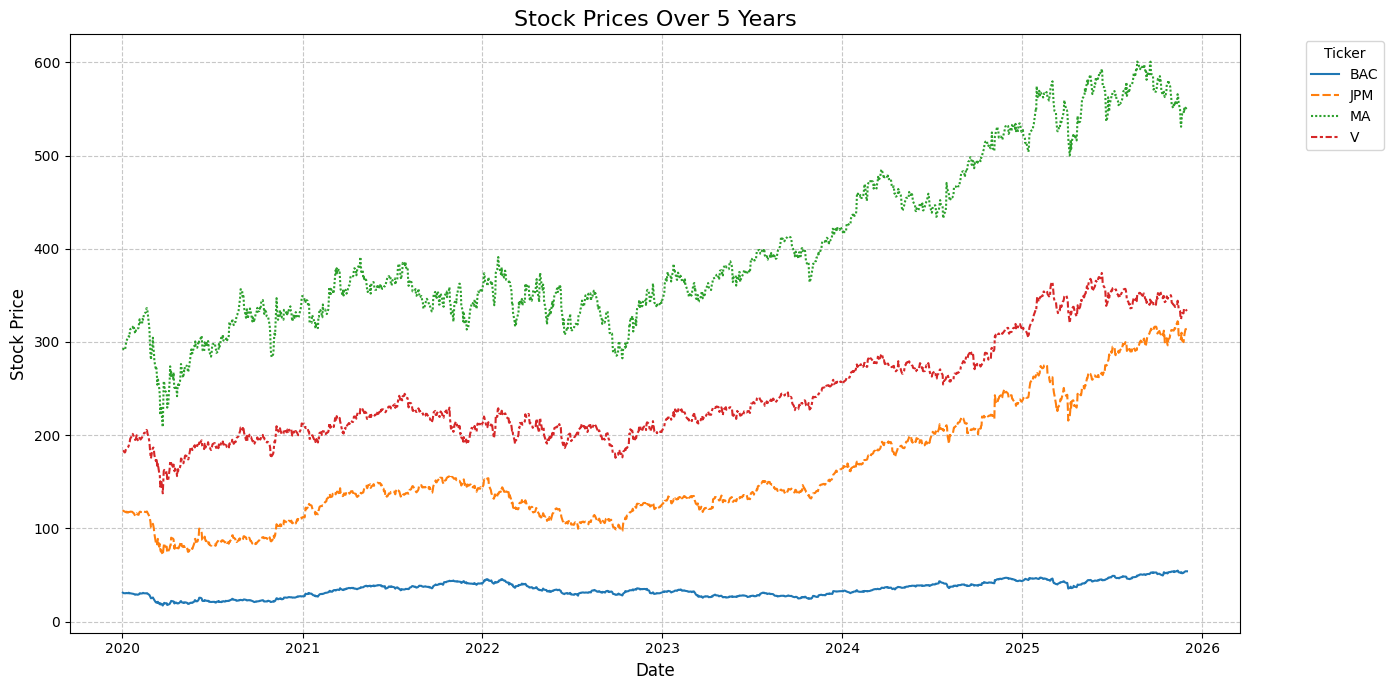

Standard Deviation of Daily Returns (Volatility):
Ticker
BAC    0.019087
JPM    0.017292
MA     0.016077
V      0.014198
dtype: float64
Correlation Matrix of Daily Returns:
Ticker       BAC       JPM        MA         V
Ticker                                        
BAC     1.000000  0.856498  0.521056  0.522561
JPM     0.856498  1.000000  0.519213  0.523509
MA      0.521056  0.519213  1.000000  0.877525
V       0.522561  0.523509  0.877525  1.000000


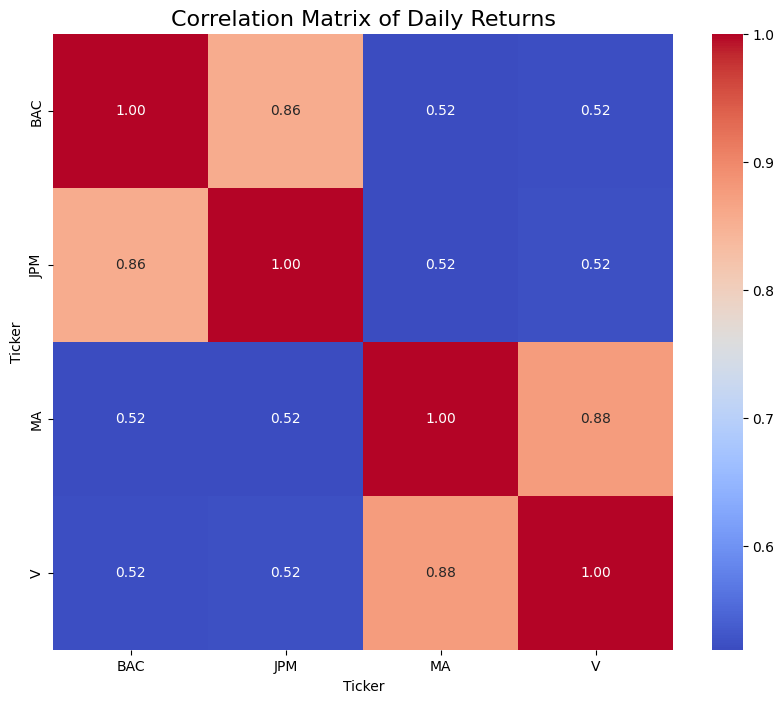

In [14]:
# Add code here 🔧
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_cleaned)
plt.title('Stock Prices Over 5 Years', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

volatility = daily_returns.std()
print("Standard Deviation of Daily Returns (Volatility):")
print(volatility)

correlation_matrix = daily_returns.corr()
print("Correlation Matrix of Daily Returns:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.show()

## Step 6: Write a Stakeholder Recommendation Memo

Now that you’ve completed your analysis, it’s time to turn your work into a clear, professional memo for a business audience.

### Scenario

You’ve been asked by a stakeholder (an investor, executive, or client) to evaluate whether it's a good time to invest in a particular industry. They’ve asked you to use recent stock performance data from several leading companies in that industry to help guide their decision.

### Your Task

Use the results from your code in Steps 2–5 to write a **multi-paragraph business memo** that:

1. **Introduces the industry you analyzed** and names the companies you included.
2. **Summarizes major trends** you observed in the stock prices over the last 5 years.
3. **Discusses key metrics**, such as volatility and correlations between companies.
4. **Presents your investment recommendation** — based on your evidence — and explains why you would or wouldn’t advise investing in this industry now.
5. **Suggests future analytics or data sources** that could strengthen or update your recommendation going forward.

This final section should show that you understand how real-world decisions evolve. Think about:
- What **additional data** might help (e.g., earnings reports, economic indicators, sentiment analysis)?
- What **types of models** could be applied (e.g., forecasting, classification, risk modeling)?
- How often should the analysis be updated?

### Format & Expectations

- Write **2–4 paragraphs** in business memo format (not bullet points).
- Use **specific, data-driven evidence** from your own analysis.
- Keep your writing professional and clear — imagine your reader is a client or executive, not a data analyst.
- Your memo should be written **entirely in your own words**. Do not copy from examples, online sources, or AI tools. Your writing should reflect your understanding and your interpretation of the results.
- You do not need to include charts in the memo — the code cells above already display them.



### Add memo here:

To: Stakeholder From: Data Analyst Date: 2025-11-20 Subject: Analysis and Investment Recommendation for the Financial Services Industry

This memo presents an analysis of the financial services industry, focusing on four leading companies: JPMorgan Chase & Co. (JPM), Visa Inc. (V), Mastercard Inc. (MA), and Bank of America Corp. (BAC). The goal is to provide an informed perspective on potential investment opportunities within this sector based on their historical stock performance over the past five years.

Over the past five years, the stock prices of these financial institutions have shown varied trends. As observed in the stock price line chart, JPM, V, and MA generally exhibited a strong upward trajectory, particularly during periods of economic growth, suggesting robust performance and investor confidence. BAC, while also showing growth, demonstrated slightly more volatility and perhaps a less consistent upward trend compared to its peers. There were observable dips across all stocks, notably during early 2020, likely attributable to global economic uncertainties, followed by strong recoveries. The overall trend indicates resilience and growth in the sector, with payment processing companies (V and MA) showing particularly strong and steady appreciation.

The key metrics of volatility and correlation provide further insight into the risk and relationships within this industry. The standard deviation of daily returns (volatility) indicates that BAC was the most volatile stock (0.0191), followed by JPM (0.0173), MA (0.0161), and V (0.0142). This suggests that Visa has been the most stable investment among the four in terms of daily price fluctuations. The correlation matrix reveals strong positive correlations among all these financial stocks. For instance, BAC and JPM exhibit a very high correlation of 0.86, indicating that their daily movements are highly synchronized. Similarly, MA and V show a strong correlation of 0.88, reflecting their similar business models in the payment processing space. The moderate correlations between the banking (BAC, JPM) and payment processing (MA, V) companies (around 0.52) suggest that while they operate in the same broader financial sector, they are not perfectly aligned, offering some diversification benefits.

Based on this analysis, I would advise a cautious yet optimistic approach to investing in this industry, with a preference for companies in the payment processing segment. Given the overall upward trend, particularly for Visa and Mastercard, and their lower volatility compared to the traditional banks, these companies present a more attractive risk-adjusted return profile. The strong correlations within sub-sectors imply that a diversified portfolio across different types of financial services (e.g., banking and payment processing) could help manage risk while still benefiting from the sector's growth. For instance, a combination of JPM (a strong bank with decent correlation to payments) and V or MA (stable growth payment processors) would offer a balanced exposure.

To strengthen future recommendations, additional analytics and data sources would be beneficial. Incorporating earnings reports, economic indicators (e.g., GDP growth, interest rates, inflation), and consumer spending data could provide a more comprehensive view of the industry's health and future prospects. Implementing more advanced models, such as time-series forecasting (e.g., ARIMA, Prophet) for predicting future stock prices or risk modeling (e.g., Value at Risk) to quantify potential losses, could enhance the precision of investment advice. Sentiment analysis from news articles and social media could also offer qualitative insights into market perception. This analysis should ideally be updated quarterly, or at minimum semi-annually, to reflect changing market conditions and company performance.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_14_LastnameFirstname.ipynb"